In [29]:
#Load the libraries and read the csv files of research disclosures and patents
import pandas as pd
import csv
import warnings
warnings.filterwarnings('ignore')
rd = pd.read_csv('rd_prediction_bert-base-uncased_32_batch_size_alpha_10.csv', usecols = ['rdid', 'year', 'Predicted_Label'])
patent = pd.read_csv('final_patent.csv', usecols = ['patent_date', 'cpc_code'])

patent.dropna(inplace=True)
patent.reset_index(drop=True, inplace=True)
patent['Year'] = pd.to_datetime(patent['patent_date']).dt.year
patent = patent[['Year', 'cpc_code']]
patent.rename(columns={'cpc_code': 'cpc_class'}, inplace=True)

rd.rename(columns={'year': 'Year', 'Predicted_Label': 'cpc_class'}, inplace=True)

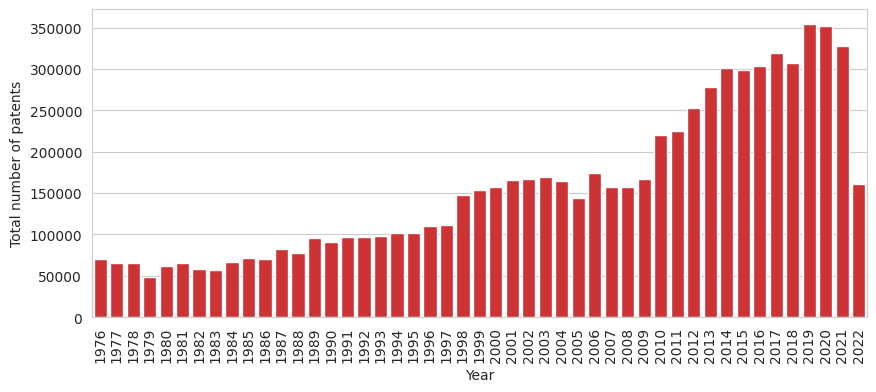

In [30]:
#Number of patents over the years

import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the counts of each year
year_counts = patent.Year.value_counts()

# Set the style of the plot
sns.set_style("whitegrid")

# Set the color palette to "Set1" and extract the blue color
color_palette = sns.color_palette("Set1")
blue_color = color_palette[0]

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 4))

# Plot the counts of years using the blue color
sns.barplot(x=year_counts.index, y=year_counts.values, color=blue_color)

# Set the labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Total number of patents')
# ax.set_title('')

# Rotate the x-axis labels by 90 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Save the figure in EPS format with width of 20 cm and no extra spaces
# plt.savefig('patent_year_count.eps', format='eps', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


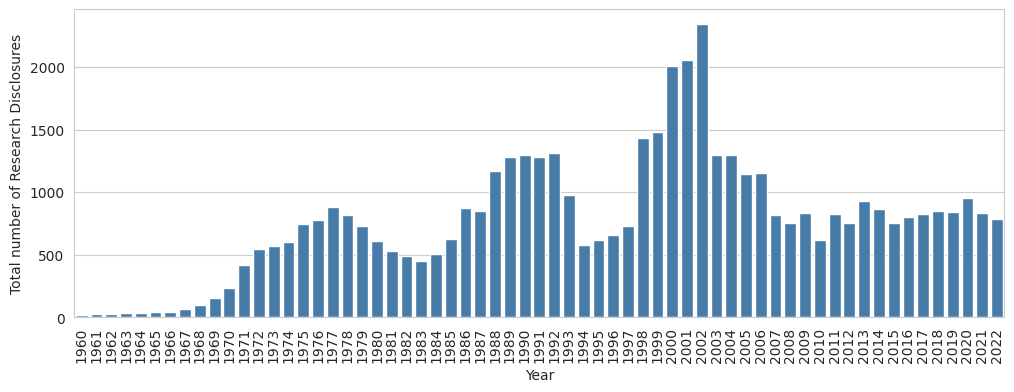

In [31]:
#Number of research disclosures over the years
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the counts of each year
year_counts = rd.Year.value_counts()

# Set the style of the plot
sns.set_style("whitegrid")

# Set the color palette to "Set1" and extract the blue color
color_palette = sns.color_palette("Set1")
blue_color = color_palette[1]

# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 4))

# Plot the counts of years using the blue color
sns.barplot(x=year_counts.index, y=year_counts.values, color=blue_color)

# Set the labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Total number of Research Disclosures')
# ax.set_title('Counts of Years')

# Rotate the x-axis labels by 90 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Save the figure in EPS format with width of 20 cm and no extra spaces
# plt.savefig('rd_year_count.eps', format='eps', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


In [32]:
#Get the correlation coefficient of the class count grouped every 5 years between research disclosures and the patents

rd = rd[rd['Year'] > 1975]
patent = patent[patent['Year'] < 2023]
import pandas as pd

# Convert 'year' column to datetime format for both DataFrames
rd['year'] = pd.to_datetime(rd['Year'], format='%Y')
patent['year'] = pd.to_datetime(patent['Year'], format='%Y')

# Filter data until 2022
rd_filtered = rd[rd['year'].dt.year <= 2022]
patent_filtered = patent[patent['year'].dt.year <= 2022]

# Group by 'cpc_class' and 'year' using a 5-year rolling window for both DataFrames
groups_rd = rd_filtered.groupby(['cpc_class', pd.Grouper(key='year', freq='5Y')])
groups_patent = patent_filtered.groupby(['cpc_class', pd.Grouper(key='year', freq='5Y')])

# Calculate the count for each group in both DataFrames
count_per_class_rd = groups_rd.size().reset_index(name='count_rd')
count_per_class_patent = groups_patent.size().reset_index(name='count_patent')

# Merge the two DataFrames using an outer join to include all combinations of 'cpc_class' and 'year'
merged_df = count_per_class_rd.merge(count_per_class_patent, on=['cpc_class', 'year'], how='outer')

# Fill NaN values (missing rows from 'rd') with 0 as the count
merged_df['count_rd'] = merged_df['count_rd'].fillna(0)

correlation = merged_df['count_patent'].value_counts().corr(merged_df['count_rd'].value_counts())
print("Correlation coefficient:", correlation)

Correlation coefficient: 0.22288574088883742


In [33]:
#Correlation coefficient between sector counts of patents and research disclosures
patent['cpc_class'].fillna('', inplace=True)
patent['cpc_1'] = patent['cpc_class'].apply(lambda x: x[0] if len(x) > 0 else 'Na')
patent = patent.dropna(subset=['cpc_class'])
value_counts_over_time_patent = patent.groupby('Year')['cpc_1'].value_counts().unstack(fill_value=0)
rd['cpc_class'].fillna('', inplace=True)
rd['cpc_1'] = rd['cpc_class'].apply(lambda x: x[0])
rd = rd[rd['Year'] > 1975]
value_counts_over_time_rd = rd.groupby('Year')['cpc_1'].value_counts().unstack(fill_value=0)

In [34]:
correlation = patent['cpc_1'].value_counts().corr(rd['cpc_1'].value_counts())
print("Correlation coefficient:", correlation)

Correlation coefficient: 0.8082568088544467


In [35]:
import pandas as pd

# Assuming 'patent' and 'rd' are the DataFrames

# Get the common columns between 'patent' and 'rd' DataFrames
common_columns = value_counts_over_time_patent.columns.intersection(value_counts_over_time_rd.columns)

# Calculate correlations for the common columns
correlations = value_counts_over_time_patent[common_columns].corrwith(value_counts_over_time_rd[common_columns])

# Print the correlations
print(correlations)

cpc_1
A    0.172701
B    0.450927
C   -0.391575
D    0.517259
E    0.629257
F    0.385483
G    0.047273
H   -0.074100
dtype: float64


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


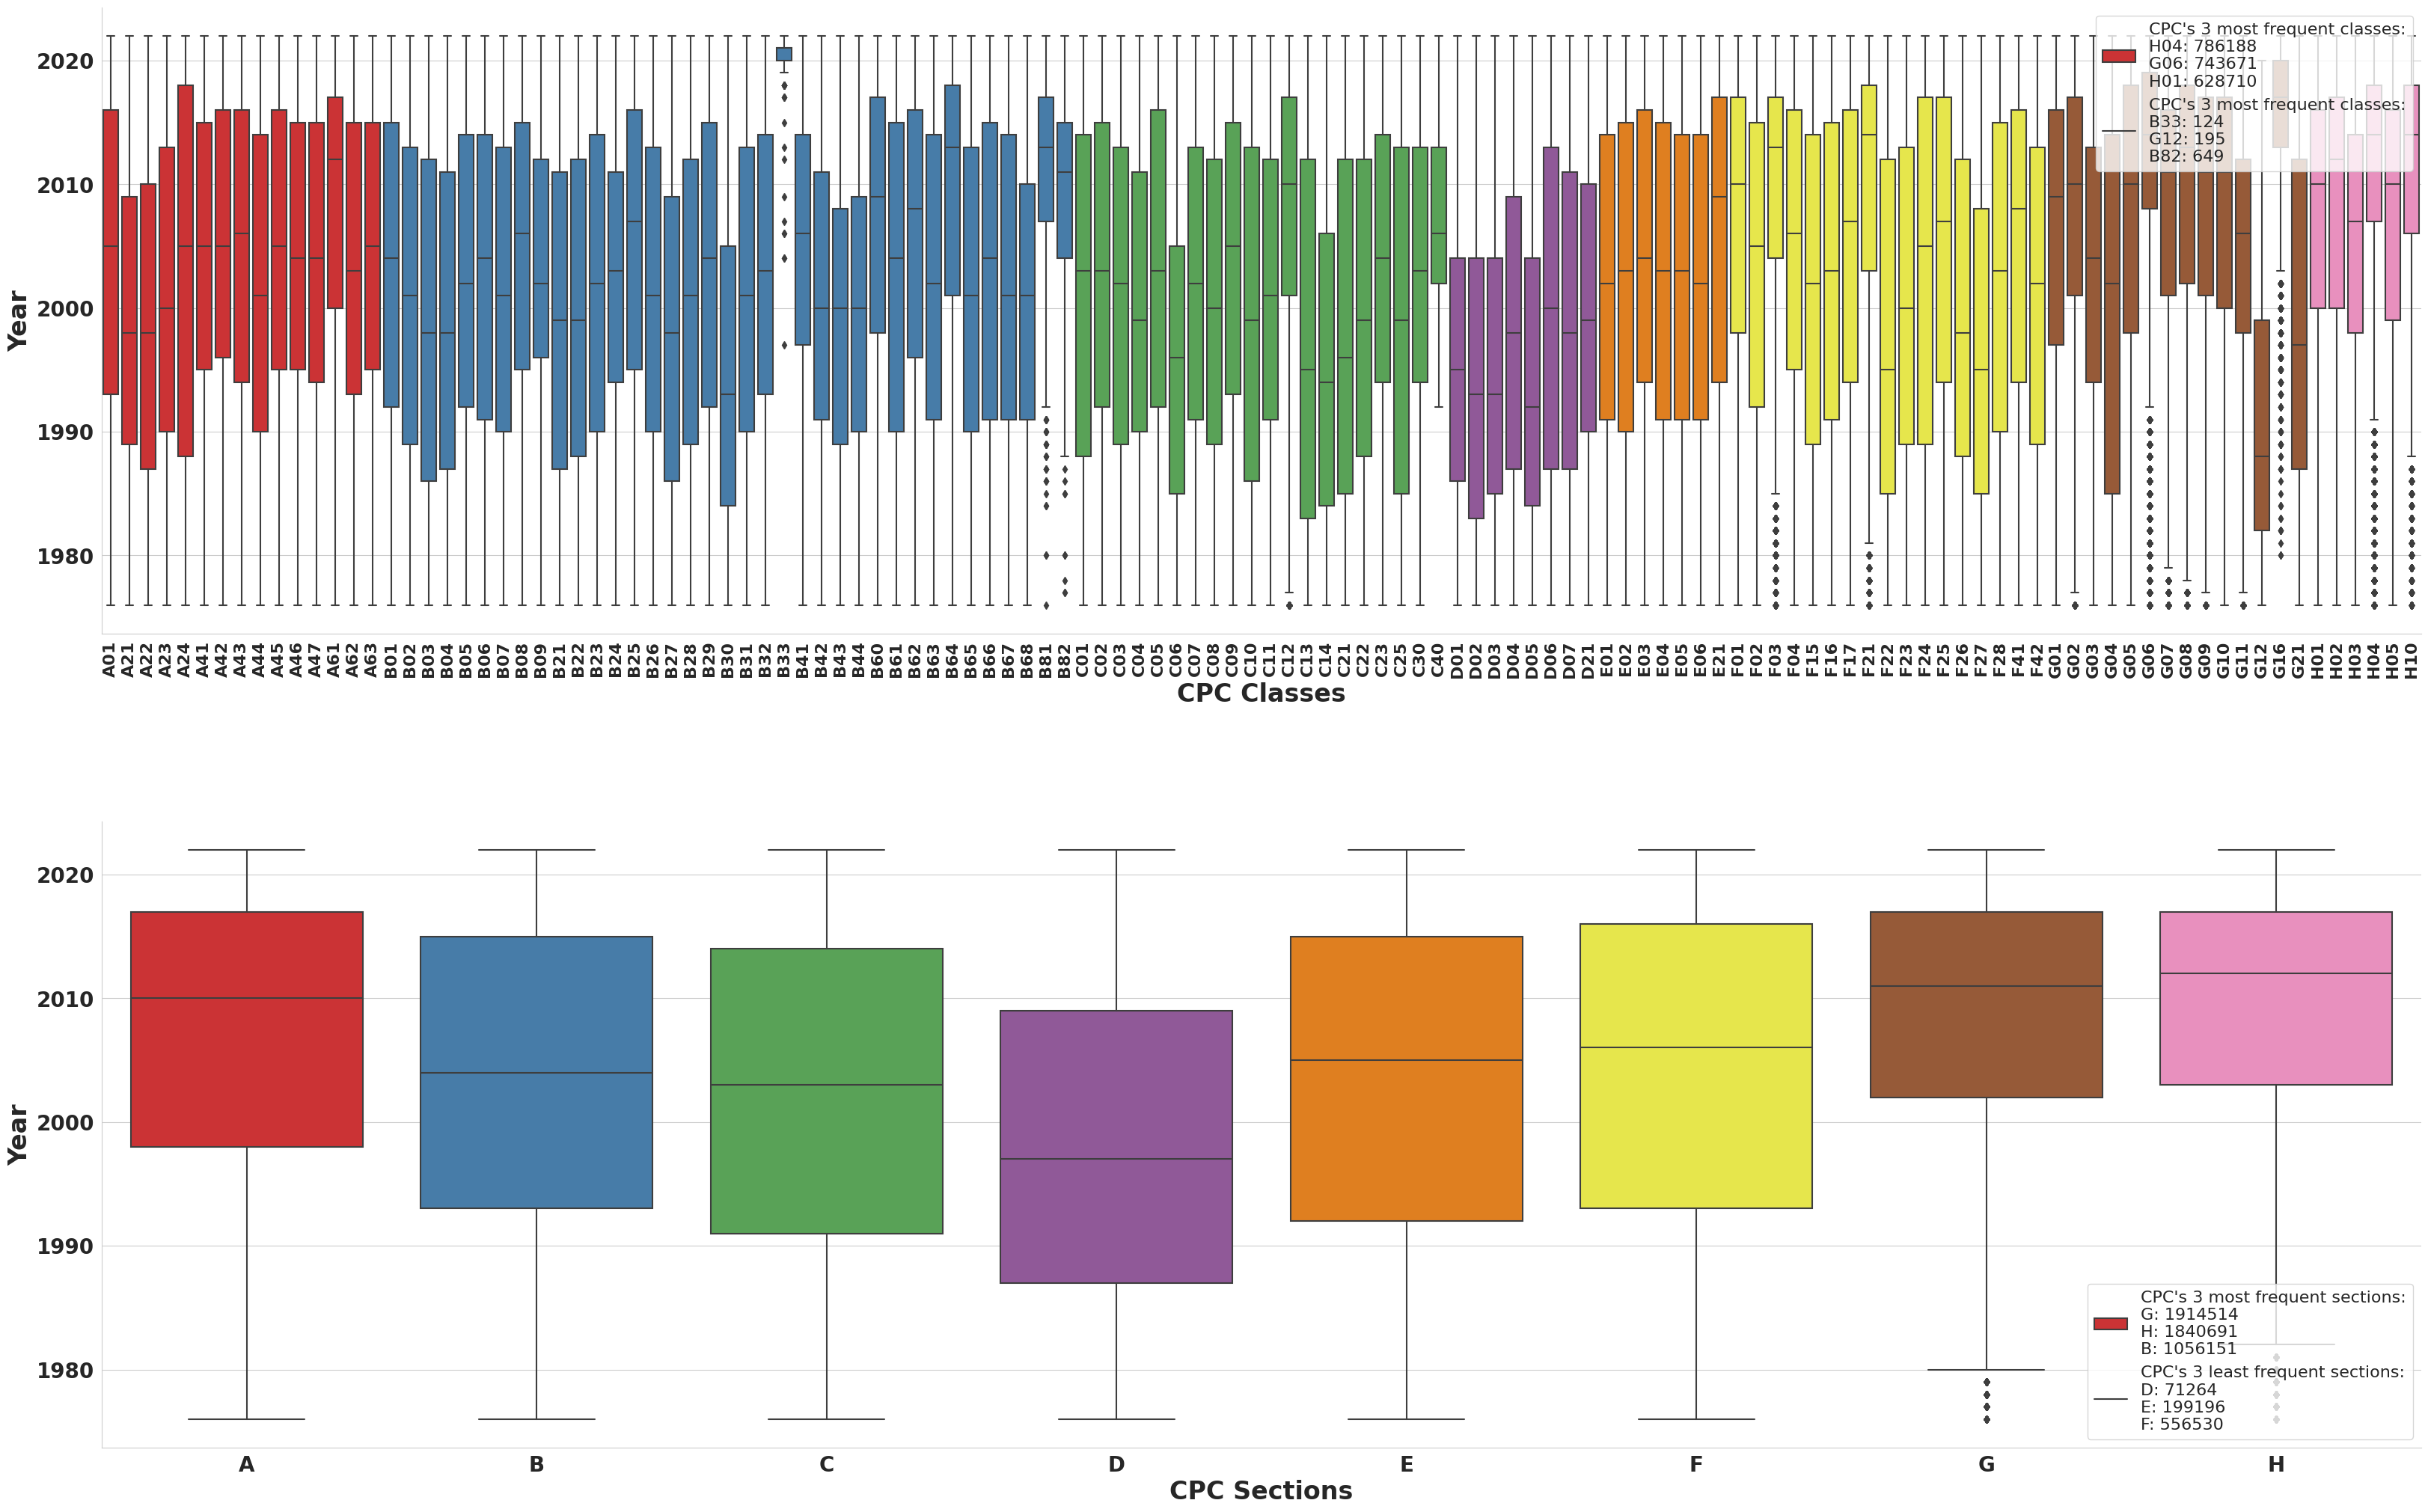

In [36]:
#CPC sectors and classes distribution over the years using bar plots for patents
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure and subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(40, 25))
patent_sorted = patent.sort_values('cpc_class')

# Set the style of the plots
sns.set_style("whitegrid")
# Get unique first letters in 'cpc_class' column
unique_first_letters = patent_sorted['cpc_class'].str[0].unique()
color_palette = sns.color_palette("Set1", len(unique_first_letters))

# Create a dictionary to store the color mapping
color_dict = {}

# Assign colors based on the first letter of 'cpc_class'
for letter, color in zip(unique_first_letters, color_palette):
    matching_classes = patent_sorted[patent_sorted['cpc_class'].str.startswith(letter)]
    for cpc_class in matching_classes['cpc_class']:
        color_dict[cpc_class] = color

# Calculate top and bottom 3 total counts of cpc_class
top_cpc_class_counts = patent_sorted['cpc_class'].value_counts().nlargest(3)
bottom_cpc_class_counts = patent_sorted['cpc_class'].value_counts().nsmallest(3)

# Create the legend text for top and bottom 3 counts of cpc_class
top_cpc_class_legend_text = '\n'.join(f'{cpc_class}: {count}' for cpc_class, count in top_cpc_class_counts.iteritems())
bottom_cpc_class_legend_text = '\n'.join(f'{cpc_class}: {count}' for cpc_class, count in bottom_cpc_class_counts.iteritems())

# Plot 1: Box plot with legends for top and bottom 3 counts of cpc_class
sns.boxplot(data=patent_sorted, x='cpc_class', y='Year', ax=ax1, palette=color_dict)
ax1.legend([f'CPC\'s 3 most frequent classes:\n{top_cpc_class_legend_text}', f'CPC\'s 3 most frequent classes:\n{bottom_cpc_class_legend_text}'], loc='upper right', fontsize=16)

# Set the labels and title for Plot 1
ax1.set_xlabel('CPC Classes', fontsize=24, fontweight='bold')
ax1.set_ylabel('Year', fontsize=24, fontweight='bold')
# ax1.set_title('Year vs cpc_class', fontsize=28, fontweight='bold')

# Set the font size and weight of x-axis tick labels
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, fontsize=16, fontweight='bold')
ax1.set_yticklabels(ax1.get_yticklabels(), fontsize=20, fontweight='bold')

# Set the font weight of y-axis label
ax1.yaxis.label.set_fontweight('bold')

# Remove spines (borders) of Plot 1
sns.despine(ax=ax1)

# Group by 'cpc_1' and assign the same color to each group
cpc_1_groups = patent_sorted.groupby('cpc_1')
unique_cpc_1 = sorted(patent_sorted['cpc_1'].unique())
colors = sns.color_palette("Set1", len(unique_cpc_1))
color_dict = dict(zip(unique_cpc_1, colors))

# Calculate top and bottom 3 total counts of cpc_1
top_cpc_1_counts = patent_sorted['cpc_1'].value_counts().nlargest(3)
bottom_cpc_1_counts = patent_sorted['cpc_1'].value_counts().nsmallest(3)

# Create the legend text for top and bottom 3 counts of cpc_1
top_cpc_1_legend_text = '\n'.join(f'{cpc_1}: {count}' for cpc_1, count in top_cpc_1_counts.iteritems())
bottom_cpc_1_legend_text = '\n'.join(f'{cpc_1}: {count}' for cpc_1, count in bottom_cpc_1_counts.iteritems())

# Plot 2: Box plot with colored groups and legends for top and bottom 3 counts of cpc_1
sns.boxplot(data=patent_sorted, x='cpc_1', y='Year', ax=ax2, order=unique_cpc_1, palette=color_dict.values())
ax2.legend([f'CPC\'s 3 most frequent sections:\n{top_cpc_1_legend_text}', f'CPC\'s 3 least frequent sections:\n{bottom_cpc_1_legend_text}'], loc='lower right', fontsize=16)

# Set the labels and title for Plot 2
ax2.set_xlabel('CPC Sections', fontsize=24, fontweight='bold')
ax2.set_ylabel('Year', fontsize=24, fontweight='bold')
# ax2.set_title('Year vs cpc_class (Colored Groups)', fontsize=28, fontweight='bold')

# Set the font size and weight of x-axis tick labels
ax2.set_xticklabels(ax2.get_xticklabels(), fontsize=20, fontweight='bold')
ax2.set_yticklabels(ax2.get_yticklabels(), fontsize=20, fontweight='bold')

# Set the font weight of y-axis label
ax2.yaxis.label.set_fontweight('bold')

# Remove spines (borders) and ticks of Plot 2
sns.despine(ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels())

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.3)

# Save the figure in EPS format
plt.savefig('patent.eps', format='eps', dpi=300, bbox_inches='tight')

# Save the figure in PNG format
plt.savefig('patent.png', format='png', dpi=300)

# Show the plot
plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


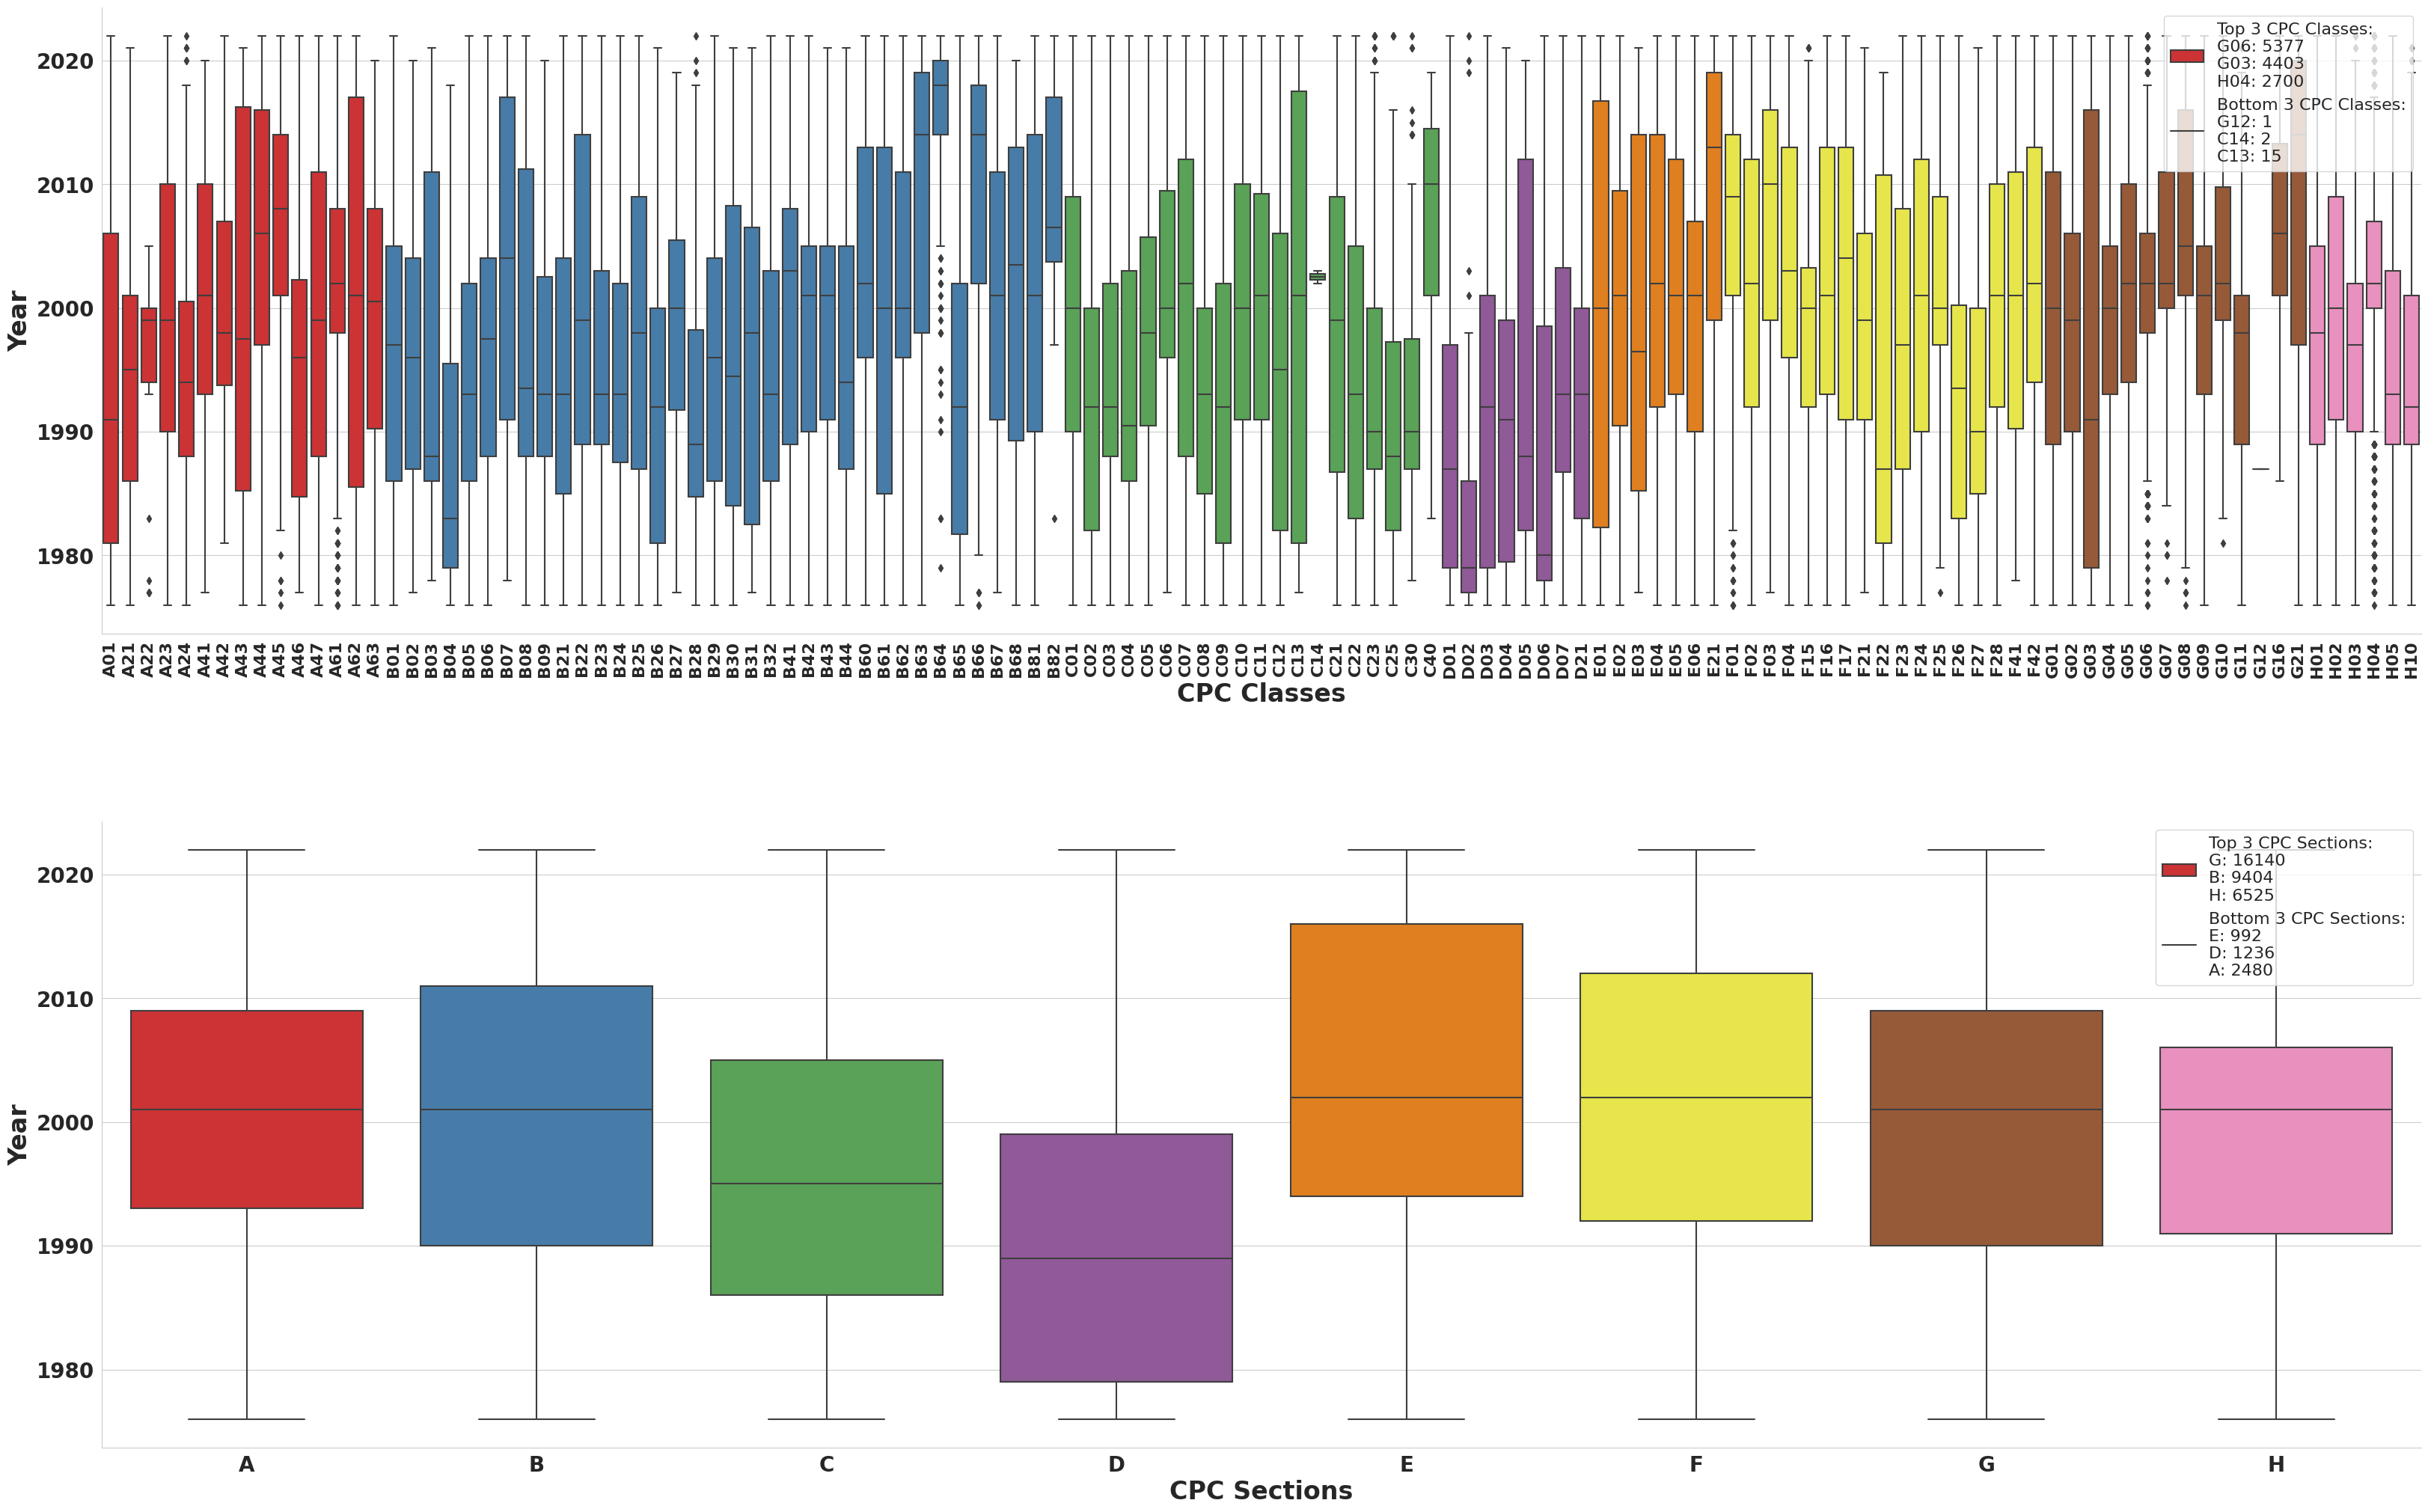

In [37]:
#CPC sectors and classes distribution over the years using bar plots for research disclosures

import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure and subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(40, 25))
rd_sorted = rd.sort_values('cpc_class')

# Set the style of the plots
sns.set_style("whitegrid")
color_palette = sns.color_palette("Set1", len(unique_first_letters))

# Get unique first letters in 'cpc_class' column
unique_first_letters = rd_sorted['cpc_class'].str[0].unique()

# Create a dictionary to store the color mapping
color_dict = {}

# Assign colors based on the first letter of 'cpc_class'
for letter, color in zip(unique_first_letters, color_palette):
    matching_classes = rd_sorted[rd_sorted['cpc_class'].str.startswith(letter)]
    for cpc_class in matching_classes['cpc_class']:
        color_dict[cpc_class] = color

# Calculate top and bottom 3 total counts of cpc_class
top_cpc_class_counts = rd_sorted['cpc_class'].value_counts().nlargest(3)
bottom_cpc_class_counts = rd_sorted['cpc_class'].value_counts().nsmallest(3)

# Create the legend text for top and bottom 3 counts of cpc_class
top_cpc_class_legend_text = '\n'.join(f'{cpc_class}: {count}' for cpc_class, count in top_cpc_class_counts.iteritems())
bottom_cpc_class_legend_text = '\n'.join(f'{cpc_class}: {count}' for cpc_class, count in bottom_cpc_class_counts.iteritems())

# Plot 1: Box plot with legends for top and bottom 3 counts of cpc_class
sns.boxplot(data=rd_sorted, x='cpc_class', y='Year', ax=ax1, palette=color_dict)
ax1.legend([f'Top 3 CPC Classes:\n{top_cpc_class_legend_text}', f'Bottom 3 CPC Classes:\n{bottom_cpc_class_legend_text}'], loc='upper right', fontsize=16)

# Set the labels and title for Plot 1
ax1.set_xlabel('CPC Classes', fontsize=24, fontweight='bold')
ax1.set_ylabel('Year', fontsize=24, fontweight='bold')
# ax1.set_title('Year vs cpc_class', fontsize=28, fontweight='bold')

# Set the font size and weight of x-axis tick labels
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, fontsize=16, fontweight='bold')
ax1.set_yticklabels(ax1.get_yticklabels(), fontsize=20, fontweight='bold')

# Set the font weight of y-axis label
ax1.yaxis.label.set_fontweight('bold')

# Remove spines (borders) of Plot 1
sns.despine(ax=ax1)

# Group by 'cpc_1' and assign the same color to each group
cpc_1_groups = rd_sorted.groupby('cpc_1')
unique_cpc_1 = sorted(rd_sorted['cpc_1'].unique())
colors = sns.color_palette("Set1", len(unique_cpc_1))
color_dict = dict(zip(unique_cpc_1, colors))

# Calculate top and bottom 3 total counts of cpc_1
top_cpc_1_counts = rd_sorted['cpc_1'].value_counts().nlargest(3)
bottom_cpc_1_counts = rd_sorted['cpc_1'].value_counts().nsmallest(3)

# Create the legend text for top and bottom 3 counts of cpc_1
top_cpc_1_legend_text = '\n'.join(f'{cpc_1}: {count}' for cpc_1, count in top_cpc_1_counts.iteritems())
bottom_cpc_1_legend_text = '\n'.join(f'{cpc_1}: {count}' for cpc_1, count in bottom_cpc_1_counts.iteritems())

# Plot 2: Box plot with colored groups and legends for top and bottom 3 counts of cpc_1
sns.boxplot(data=rd_sorted, x='cpc_1', y='Year', ax=ax2, order=unique_cpc_1, palette=color_dict.values())
ax2.legend([f'Top 3 CPC Sections:\n{top_cpc_1_legend_text}', f'Bottom 3 CPC Sections:\n{bottom_cpc_1_legend_text}'], loc='upper right', fontsize=16)

# Set the labels and title for Plot 2
ax2.set_xlabel('CPC Sections', fontsize=24, fontweight='bold')
ax2.set_ylabel('Year', fontsize=24, fontweight='bold')
# ax2.set_title('Year vs cpc_class (Colored Groups)', fontsize=28, fontweight='bold')

# Set the font size and weight of x-axis tick labels
ax2.set_xticklabels(ax2.get_xticklabels(), fontsize=20, fontweight='bold')
ax2.set_yticklabels(ax2.get_yticklabels(), fontsize=20, fontweight='bold')

# Set the font weight of y-axis label
ax2.yaxis.label.set_fontweight('bold')

# Remove spines (borders) and ticks of Plot 2
sns.despine(ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels())

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.3)

# Save the figure in EPS format
plt.savefig('rd.eps', format='eps', dpi=300, bbox_inches='tight')

# Save the figure in PNG format
plt.savefig('rd.png', format='png', dpi=300)

# Show the plot
plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


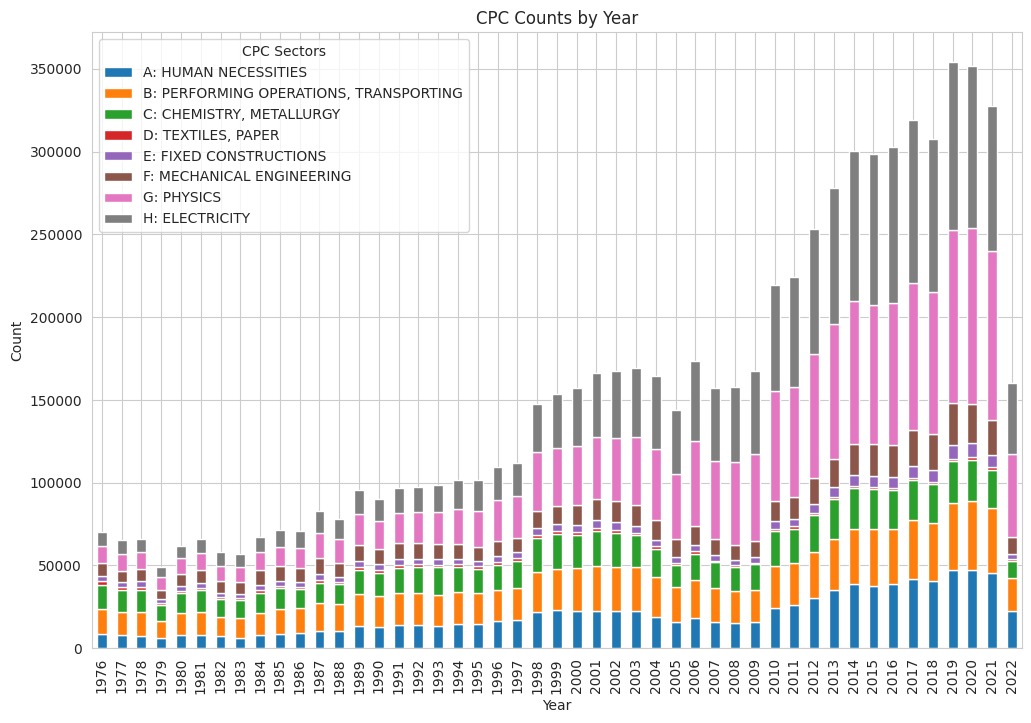

In [38]:
#stacked bar plot of patent's sectors over the years
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

cpc_labels = {
    'A': 'A: HUMAN NECESSITIES',
    'B': 'B: PERFORMING OPERATIONS, TRANSPORTING',
    'C': 'C: CHEMISTRY, METALLURGY',
    'D': 'D: TEXTILES, PAPER',
    'E': 'E: FIXED CONSTRUCTIONS',
    'F': 'F: MECHANICAL ENGINEERING',
    'G': 'G: PHYSICS',
    'H': 'H: ELECTRICITY'
}

# Step 2: Count the occurrences of cpc_1 by year
year_cpc_counts = patent.groupby('Year')['cpc_1'].value_counts().unstack(fill_value=0)

# Get unique cpc_1 values and assign colors
unique_cpc_1 = year_cpc_counts.columns
boxplot_colors = sns.color_palette("Set1", len(unique_cpc_1))

# Create a figure and axes with specified size
fig, ax = plt.subplots(figsize=(12, 8))

# Create stacked bar plot with custom colors
year_cpc_counts.plot.bar(stacked=True, ax=ax)

# Customize the plot
ax.set_xlabel('Year')
ax.set_ylabel('Count')
ax.set_title('CPC Counts by Year')

# Add legend with CPC labels
legend_labels = [cpc_labels[label] for label in unique_cpc_1]
ax.legend(legend_labels, title='CPC Sectors')

plt.savefig('stacked_bar_patent.eps', format='eps', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


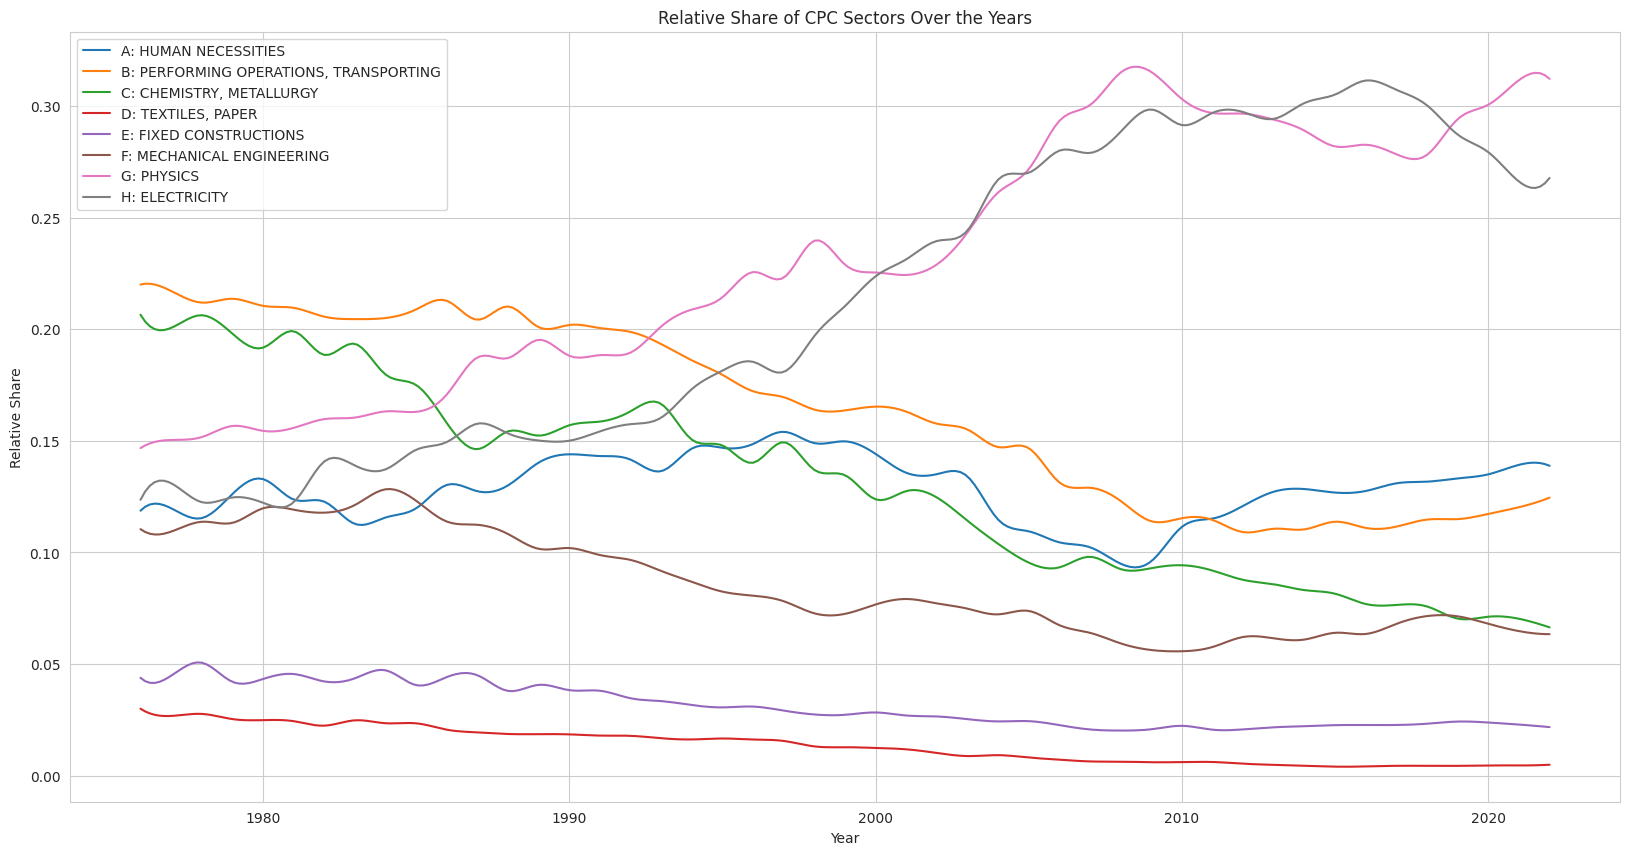

In [39]:
#Relative share of each sector in patents over the years
patents = year_cpc_counts

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.interpolate import make_interp_spline

# Assuming "year_cpc_counts" is the DataFrame containing the data

cpc_labels = {
    'A': 'A: HUMAN NECESSITIES',
    'B': 'B: PERFORMING OPERATIONS, TRANSPORTING',
    'C': 'C: CHEMISTRY, METALLURGY',
    'D': 'D: TEXTILES, PAPER',
    'E': 'E: FIXED CONSTRUCTIONS',
    'F': 'F: MECHANICAL ENGINEERING',
    'G': 'G: PHYSICS',
    'H': 'H: ELECTRICITY'
}

# Calculate relative shares
year_cpc_relative_share_patents = patents.div(patents.sum(axis=1), axis=0)

# Plotting
plt.figure(figsize=(20, 10))

for column in year_cpc_relative_share_patents.columns:
    x = year_cpc_relative_share_patents.index
    y = year_cpc_relative_share_patents[column]
    X_Y_Spline = make_interp_spline(x, y)
    X_ = np.linspace(x.min(), x.max(), 300)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label=cpc_labels[column])
    

plt.xlabel('Year')
plt.ylabel('Relative Share')
plt.title('Relative Share of CPC Sectors Over the Years')
plt.legend()


plt.savefig('relative_share_patents.eps', format='eps', dpi=300, bbox_inches='tight')
plt.savefig('relative_share_patents.png', format='png', dpi=300, bbox_inches='tight')

plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


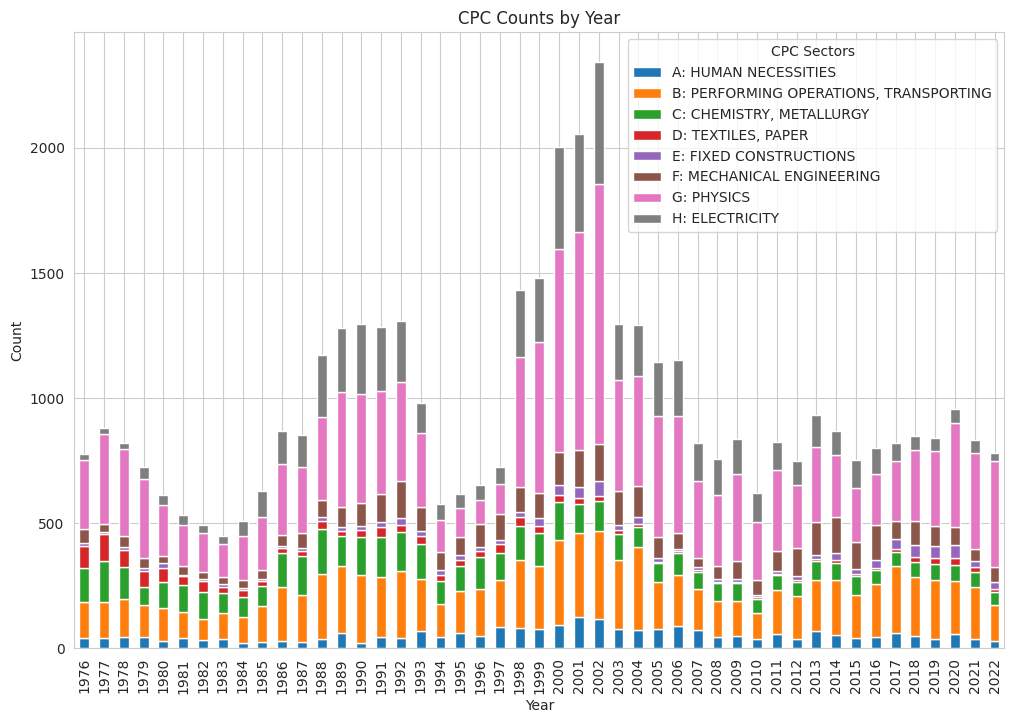

In [40]:
#stacked bar plot of patent's sectors over the years
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

cpc_labels = {
    'A': 'A: HUMAN NECESSITIES',
    'B': 'B: PERFORMING OPERATIONS, TRANSPORTING',
    'C': 'C: CHEMISTRY, METALLURGY',
    'D': 'D: TEXTILES, PAPER',
    'E': 'E: FIXED CONSTRUCTIONS',
    'F': 'F: MECHANICAL ENGINEERING',
    'G': 'G: PHYSICS',
    'H': 'H: ELECTRICITY'
}

# Step 2: Count the occurrences of cpc_1 by year
year_cpc_counts = rd.groupby('Year')['cpc_1'].value_counts().unstack(fill_value=0)

# Get unique cpc_1 values and assign colors
unique_cpc_1 = year_cpc_counts.columns
boxplot_colors = sns.color_palette("Set1", len(unique_cpc_1))

# Create a figure and axes with specified size
fig, ax = plt.subplots(figsize=(12, 8))

# Create stacked bar plot with custom colors
year_cpc_counts.plot.bar(stacked=True, ax=ax)

# Customize the plot
ax.set_xlabel('Year')
ax.set_ylabel('Count')
ax.set_title('CPC Counts by Year')

# Add legend with CPC labels
legend_labels = [cpc_labels[label] for label in unique_cpc_1]
ax.legend(legend_labels, title='CPC Sectors')

plt.savefig('stacked_bar_rd.eps', format='eps', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


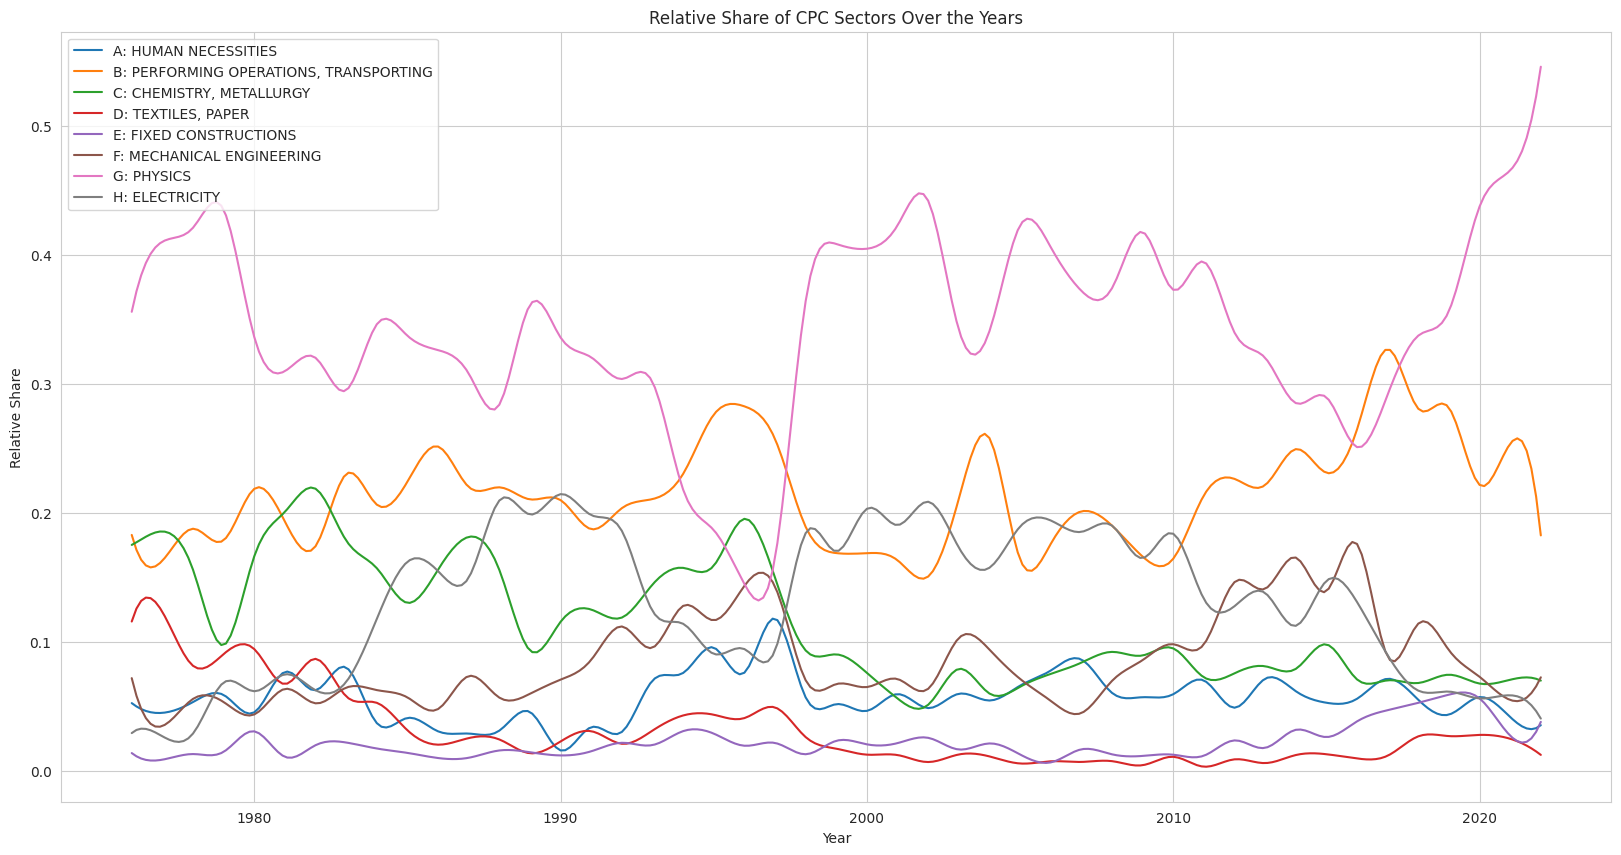

In [41]:
#Relative share of each sector in research disclosures over the years

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.interpolate import make_interp_spline

# Assuming "year_cpc_counts" is the DataFrame containing the data
rd_ = year_cpc_counts
cpc_labels = {
    'A': 'A: HUMAN NECESSITIES',
    'B': 'B: PERFORMING OPERATIONS, TRANSPORTING',
    'C': 'C: CHEMISTRY, METALLURGY',
    'D': 'D: TEXTILES, PAPER',
    'E': 'E: FIXED CONSTRUCTIONS',
    'F': 'F: MECHANICAL ENGINEERING',
    'G': 'G: PHYSICS',
    'H': 'H: ELECTRICITY'
}

# Calculate relative shares
year_cpc_relative_share_rd = rd_.div(rd_.sum(axis=1), axis=0)

# Plotting
plt.figure(figsize=(20, 10))

for column in year_cpc_relative_share_rd.columns:
    x = year_cpc_relative_share_rd.index
    y = year_cpc_relative_share_rd[column]
    X_Y_Spline = make_interp_spline(x, y)
    X_ = np.linspace(x.min(), x.max(), 300)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label=cpc_labels[column])

plt.xlabel('Year')
plt.ylabel('Relative Share')
plt.title('Relative Share of CPC Sectors Over the Years')
plt.legend()
plt.savefig('relative_share_rd.eps', format='eps', dpi=300, bbox_inches='tight')
plt.savefig('relative_share_rd.png', format='png', dpi=300, bbox_inches='tight')
plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


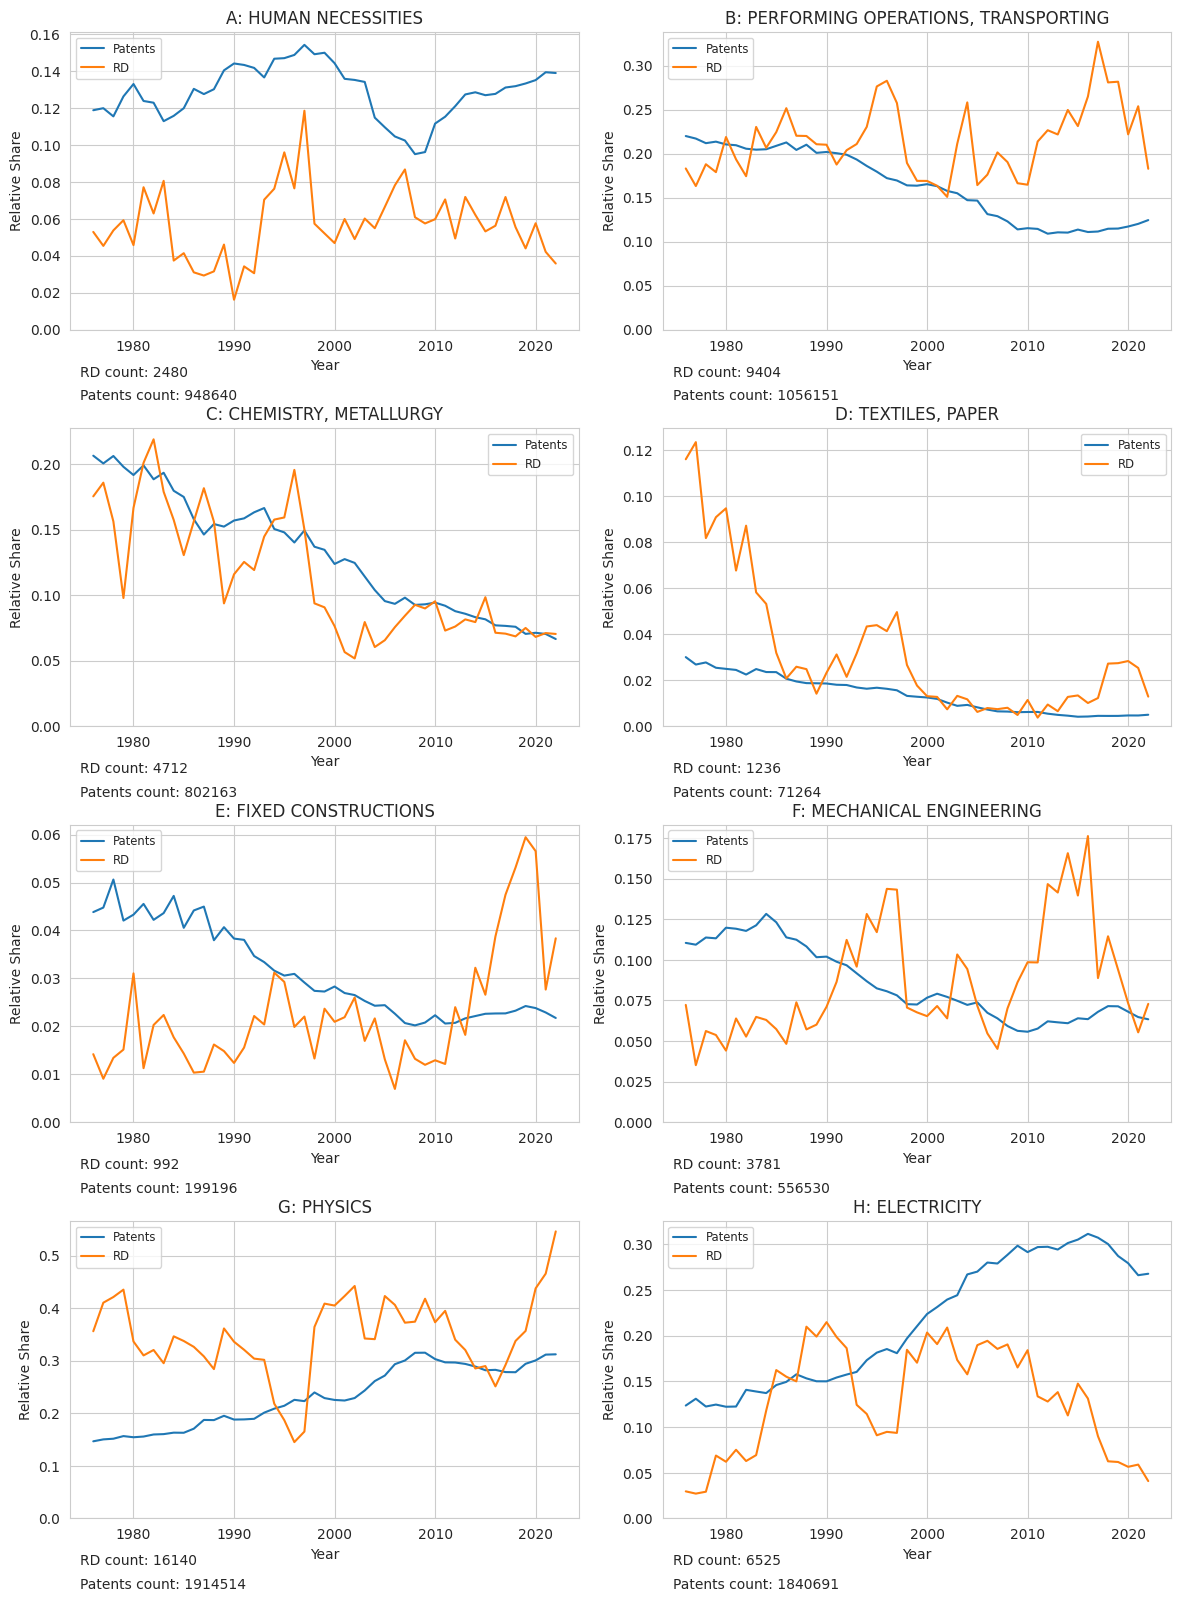

In [42]:
#Comparison of relative share of each sector between patents and research disclosures over the years

year_cpc_relative_share_patents = patents.div(patents.sum(axis=1), axis=0)
year_cpc_relative_share_rd = rd_.div(rd_.sum(axis=1), axis=0)

import matplotlib.pyplot as plt

year_cpc_relative_share_rd = rd_.div(rd_.sum(axis=1), axis=0)
year_cpc_relative_share_patents = patents.div(patents.sum(axis=1), axis=0)

# Assuming "year_cpc_relative_share_patents" and "year_cpc_relative_share_rd" are the DataFrames containing the data

cpc_labels = {
    'A': 'A: HUMAN NECESSITIES',
    'B': 'B: PERFORMING OPERATIONS, TRANSPORTING',
    'C': 'C: CHEMISTRY, METALLURGY',
    'D': 'D: TEXTILES, PAPER',
    'E': 'E: FIXED CONSTRUCTIONS',
    'F': 'F: MECHANICAL ENGINEERING',
    'G': 'G: PHYSICS',
    'H': 'H: ELECTRICITY'
}

# Get the common columns in both dataframes
common_columns = set(year_cpc_relative_share_patents.columns).intersection(year_cpc_relative_share_rd.columns)

# Sort the common columns in alphabetical order
sorted_columns = sorted(common_columns)

# Create subplots
fig, axs = plt.subplots(4, 2, figsize=(12, 16))

# Flatten the axs array for easier indexing
axs = axs.flatten()

# Iterate over sorted common columns
for i, column in enumerate(sorted_columns):
    ax = axs[i]

    # Plot line plot for patents dataframe
    ax.plot(year_cpc_relative_share_patents.index, year_cpc_relative_share_patents[column], label='Patents')

    # Plot line plot for RD dataframe
    ax.plot(year_cpc_relative_share_rd.index, year_cpc_relative_share_rd[column], label='RD')

    ax.set_xlabel('Year')
    ax.set_ylabel('Relative Share')
    ax.set_title(cpc_labels[column])
    ax.set_ylim(0)  # Set the y-axis limit to start from 0
    ax.legend(fontsize='small')

    # Calculate total count for the sector in rd and patents DataFrames
    total_rd = rd[rd['cpc_1'] == column].shape[0]
    total_patents = patent[patent['cpc_1'] == column].shape[0]

    # Calculate the position for displaying total count below the x-axis
    xpos = ax.get_xlim()[0] + 0.02 * (ax.get_xlim()[1] - ax.get_xlim()[0])
    ypos = ax.get_ylim()[0] - 0.12 * (ax.get_ylim()[1] - ax.get_ylim()[0])

    # Display total count as text in the plot below the x-axis
    ax.text(xpos, ypos, f"RD count: {total_rd}", fontsize=10, verticalalignment='top')
    ax.text(xpos, ypos - 0.08 * (ax.get_ylim()[1] - ax.get_ylim()[0]), f"Patents count: {total_patents}", fontsize=10, verticalalignment='top')

# Remove empty subplots if there are fewer columns than subplots
if len(sorted_columns) < len(axs):
    for i in range(len(sorted_columns), len(axs)):
        fig.delaxes(axs[i])

# Add space for displaying total count in the plot
fig.subplots_adjust(bottom=0.2)

# Adjust spacing between subplots
plt.tight_layout()

plt.savefig('relative_share_patents_rd.eps', format='eps', dpi=300, bbox_inches='tight')
plt.savefig('relative_share_patents_rd.png', format='png', dpi=300, bbox_inches='tight')

# Display the subplots
plt.show()


In [43]:
value_counts_over_time_rd = value_counts_over_time_rd.reset_index()
value_counts_over_time_patent = value_counts_over_time_patent.reset_index()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


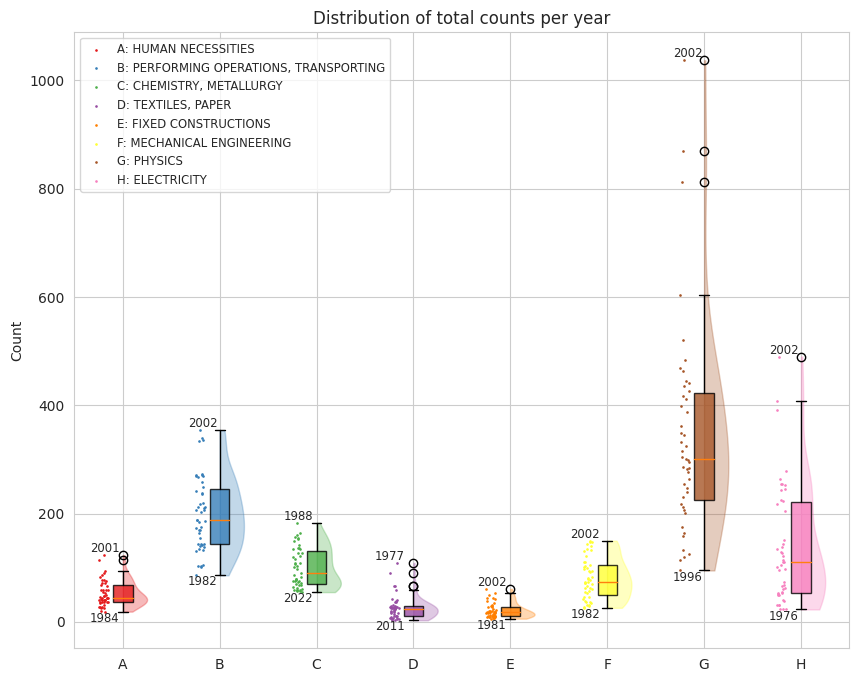

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Assuming your data is stored in a DataFrame called 'df'
feature_columns = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']  # Update with your actual column names
data_x = [value_counts_over_time_rd[column] for column in feature_columns]

# CPC labels
cpc_labels = {
    'A': 'A: HUMAN NECESSITIES',
    'B': 'B: PERFORMING OPERATIONS, TRANSPORTING',
    'C': 'C: CHEMISTRY, METALLURGY',
    'D': 'D: TEXTILES, PAPER',
    'E': 'E: FIXED CONSTRUCTIONS',
    'F': 'F: MECHANICAL ENGINEERING',
    'G': 'G: PHYSICS',
    'H': 'H: ELECTRICITY'
}

fig, ax = plt.subplots(figsize=(10, 8))  # Adjust the figsize to your desired size

# Define colors for scatter, violin, and box plots
scatter_colors = sns.color_palette("Set1", len(feature_columns))
violin_colors = sns.color_palette("Set1", len(feature_columns))
boxplot_colors = sns.color_palette("Set1", len(feature_columns))

bp = ax.boxplot(data_x, patch_artist=True, vert=True, widths=0.2)  # Set vert=True to create vertical box plots

for patch, color in zip(bp['boxes'], boxplot_colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.8)

vp = ax.violinplot(data_x, points=5000, showmeans=False, showextrema=False, showmedians=False, vert=True)

for idx, b in enumerate(vp['bodies']):
    m = np.mean(b.get_paths()[0].vertices[:, 1])
    b.get_paths()[0].vertices[:, 0] = np.clip(b.get_paths()[0].vertices[:, 0], idx + 1, idx + 2)
    b.set_color(violin_colors[idx])

for idx, features in enumerate(data_x):
    x = np.full(len(features), idx + .8)
    idxs = np.arange(len(x))
    out = x.astype(float)
    out.flat[idxs] += np.random.uniform(low=-.05, high=.05, size=len(idxs))
    x = out
    ax.scatter(x, features, s=.8, c=scatter_colors[idx], label=cpc_labels[feature_columns[idx]])  # Use ax.scatter to specify the axes and add labels

    # Add labels to scatter plot
    top_years = features.nlargest(1)
    bottom_years = features.nsmallest(1)
    for year in top_years.index:
        ax.text(x[0], features[year], str(value_counts_over_time_rd.loc[year, 'Year']), ha='center', va='bottom', fontsize='smaller')
    for year in bottom_years.index:
        ax.text(x[0], features[year], str(value_counts_over_time_rd.loc[year, 'Year']), ha='center', va='top', fontsize='smaller')

plt.xticks(np.arange(1, len(feature_columns) + 1, 1), feature_columns)  # Adjust the xticks
plt.ylabel('Count')  # Use ylabel for the count
plt.title("Distribution of total counts per year")

handles, labels = ax.get_legend_handles_labels()
legend = ax.legend(handles, labels, loc='upper left', fontsize='small')

# Set legend colors to match scatter plot colors
for handle, color in zip(legend.legendHandles, scatter_colors):
    handle.set_color(color)

# Save the figure in EPS format with width of 6 cm and no extra spaces
plt.savefig('rd_discussion.eps', format='eps', dpi=300, bbox_inches='tight')

# Save the figure in PNG format with width of 6 cm and no extra spaces
plt.savefig('rd_discussion.png', format='png', dpi=300, bbox_inches='tight')

plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


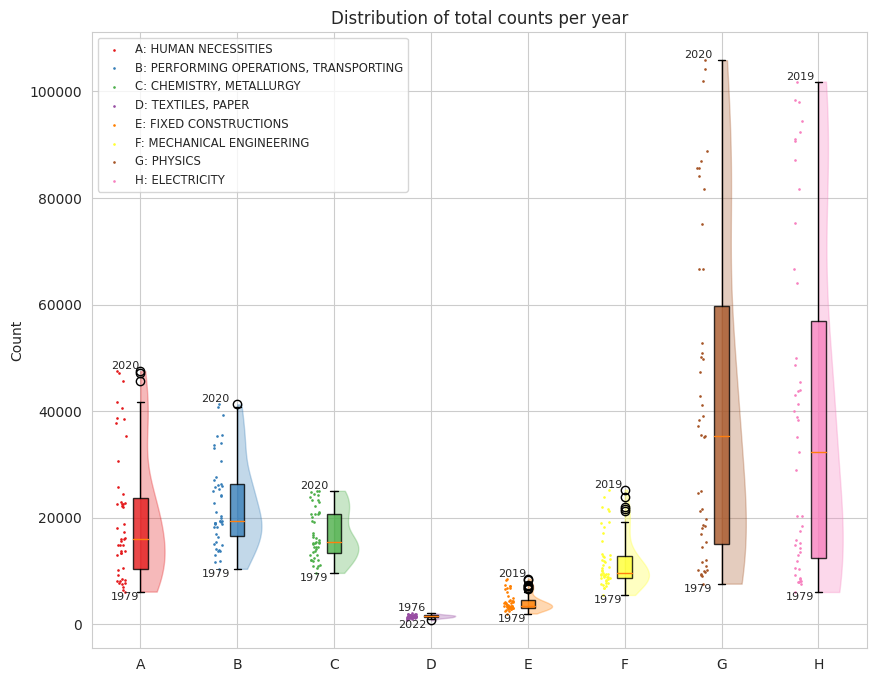

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Assuming your data is stored in a DataFrame called 'df'
feature_columns = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']  # Update with your actual column names
data_x = [value_counts_over_time_patent[column] for column in feature_columns]

# CPC labels
cpc_labels = {
    'A': 'A: HUMAN NECESSITIES',
    'B': 'B: PERFORMING OPERATIONS, TRANSPORTING',
    'C': 'C: CHEMISTRY, METALLURGY',
    'D': 'D: TEXTILES, PAPER',
    'E': 'E: FIXED CONSTRUCTIONS',
    'F': 'F: MECHANICAL ENGINEERING',
    'G': 'G: PHYSICS',
    'H': 'H: ELECTRICITY'
}

fig, ax = plt.subplots(figsize=(10, 8), sharey=True)  # Use sharey=True to create a shared y-axis

# Define colors for scatter, violin, and box plots
scatter_colors = sns.color_palette("Set1", len(feature_columns))
violin_colors = sns.color_palette("Set1", len(feature_columns))
boxplot_colors = sns.color_palette("Set1", len(feature_columns))

bp = ax.boxplot(data_x, patch_artist=True, vert=True, widths=0.15)  # Set vert=True to create vertical box plots

for patch, color in zip(bp['boxes'], boxplot_colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.8)

vp = ax.violinplot(data_x, points=5000, showmeans=False, showextrema=False, showmedians=False, vert=True)

for idx, b in enumerate(vp['bodies']):
    m = np.mean(b.get_paths()[0].vertices[:, 1])
    b.get_paths()[0].vertices[:, 0] = np.clip(b.get_paths()[0].vertices[:, 0], idx + 1, idx + 2)
    b.set_color(violin_colors[idx])

for idx, features in enumerate(data_x):
    x = np.full(len(features), idx + .8)
    idxs = np.arange(len(x))
    out = x.astype(float)
    out.flat[idxs] += np.random.uniform(low=-.05, high=.05, size=len(idxs))
    x = out
    ax.scatter(x, features, s=.8, c=scatter_colors[idx], label=cpc_labels[feature_columns[idx]])  # Use ax.scatter to specify the axes and add labels

    # Add labels to scatter plot
    top_years = features.nlargest(1)
    bottom_years = features.nsmallest(1)
    # print(top_years, bottom_years)
    for year in top_years.index:
        ax.text(x[0], features[year], str(value_counts_over_time_patent.loc[year, 'Year']), ha='center', va='bottom', fontsize=8)
    for year in bottom_years.index:
        ax.text(x[0], features[year], str(value_counts_over_time_patent.loc[year, 'Year']), ha='center', va='top', fontsize=8)

plt.xticks(np.arange(1, len(feature_columns) + 1, 1), feature_columns)  # Adjust the xticks
plt.ylabel('Count')  # Use ylabel for the count
plt.title("Distribution of total counts per year")

handles, labels = ax.get_legend_handles_labels()
legend = ax.legend(handles, labels, loc='upper left', fontsize='small')

# Set legend colors to match scatter plot colors
for handle, color in zip(legend.legendHandles, scatter_colors):
    handle.set_color(color)

# Save the figure in EPS format with width of 8 cm and no extra spaces
plt.savefig('patent_discussion.eps', format='eps', dpi=300, bbox_inches='tight')

# Save the figure in PNG format with width of 8 cm and no extra spaces
plt.savefig('patent_discussion.png', format='png', dpi=300, bbox_inches='tight')
plt.show()
